In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [2]:
df = pd.read_csv('creditcard.csv')
df.drop('Time', inplace = True, axis = 1)
df['Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
df = shuffle(df)
x = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1])
split_point = int(len(x)*0.8)
x_train = x[:split_point]
y_train = y[:split_point]
x_test = x[split_point:]
y_test = y[split_point:]
undersample = RandomUnderSampler(sampling_strategy={0:5000})
x_train, y_train = undersample.fit_resample(x_train, y_train)
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

55142 1716 8 96
precision 0.052980132450331126
recall 0.9230769230769231
f1_score 0.10020876826722337


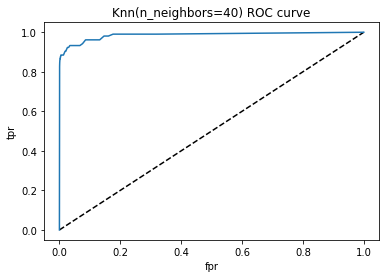

AUC 0.9856727251695858


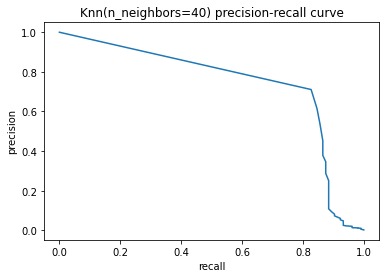

precision-recall 0.7410475050218724


In [3]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_proba = knn.predict_proba(x_test)[:,1]
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print("precision", metrics.precision_score(y_test,y_pred))
print("recall", metrics.recall_score(y_test,y_pred))
print("f1_score", metrics.f1_score(y_test,y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=40) ROC curve')
plt.show()
print("AUC",roc_auc_score(y_test,y_pred_proba))
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall,precision, label='Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors=40) precision-recall curve')
plt.show()
print("precision-recall" , metrics.auc(recall, precision))

55643 1215 6 98
precision 0.07463823305407463
recall 0.9423076923076923
f1_score 0.13832039520112913


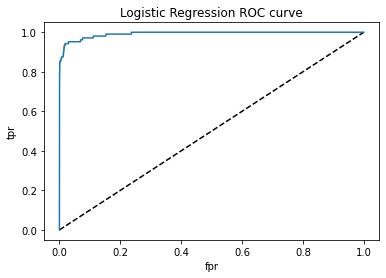

AUC 0.9921461731925958


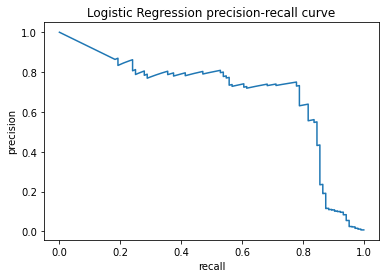

precision-recall 0.6911324830253377


In [4]:
lgr = LogisticRegression()
lgr.fit(x_train, y_train)
y_pred = lgr.predict(x_test)
y_pred_proba = lgr.predict_proba(x_test)[:,1]
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print("precision", metrics.precision_score(y_test,y_pred))
print("recall", metrics.recall_score(y_test,y_pred))
print("f1_score", metrics.f1_score(y_test,y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()
print("AUC",roc_auc_score(y_test,y_pred_proba))
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall,precision, label='Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Logistic Regression precision-recall curve')
plt.show()
print("precision-recall" , metrics.auc(recall, precision))

56747 111 11 93
precision 0.45588235294117646
recall 0.8942307692307693
f1_score 0.6038961038961038


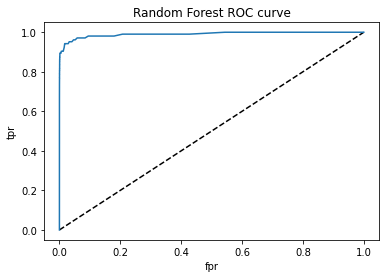

AUC 0.9905749512280256


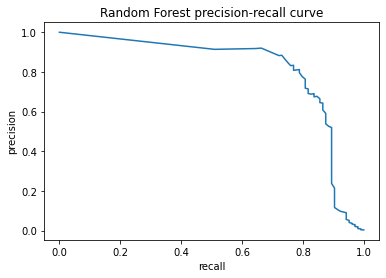

precision-recall 0.8150510088761724


In [5]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[:,1]
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print("precision", metrics.precision_score(y_test,y_pred))
print("recall", metrics.recall_score(y_test,y_pred))
print("f1_score", metrics.f1_score(y_test,y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.show()
print("AUC",roc_auc_score(y_test,y_pred_proba))
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall,precision, label='Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Random Forest precision-recall curve')
plt.show()
print("precision-recall" , metrics.auc(recall, precision))

313/313 [==============================] - 0s 531us/step - loss: 0.1718 - accuracy: 0.9285
55776 1082 7 97
precision 0.08227311280746395
recall 0.9326923076923077
f1_score 0.15120810600155887


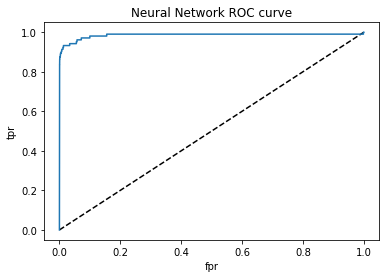

AUC 0.9852181514271722


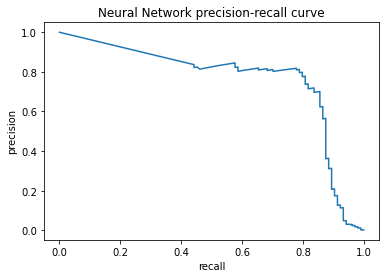

Area under precision-recall 0.7642608070169529


In [6]:
model=Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(x_train, y_train)
y_pred_proba = model.predict(x_test)
y_pred = (model.predict(x_test) > 0.5).astype("int32")
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print("precision", metrics.precision_score(y_test,y_pred))
print("recall", metrics.recall_score(y_test,y_pred))
print("f1_score", metrics.f1_score(y_test,y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Neural Network ROC curve')
plt.show()
print("AUC",roc_auc_score(y_test,y_pred_proba))
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall,precision, label='Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Neural Network precision-recall curve')
plt.show()
print("Area under precision-recall" , metrics.auc(recall, precision))